In [2]:
import time
time.sleep(60*10)

In [3]:
#!pip install tensorflow==1.14.0

In [4]:
#!pip install keras==2.2.5

In [5]:
import os
os.environ["PYTHONHASHSEED"] = "13"
os.environ["CUDA_VISIBLE_DEVICES"] = "0:1"

import numpy as np
import tensorflow as tf
import random as rn

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(13)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(13)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
# For further details, see: https://stackoverflow.com/questions/42022950/

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(13)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [6]:
import gc
import warnings

#import lightgbm as lgb
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from tqdm.notebook import tqdm

import keras
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout

path_data = "../input/ashrae-energy-prediction/"
path_train = path_data + "train.csv"
path_test = path_data + "test.csv"
path_building = path_data + "building_metadata.csv"
path_weather_train = path_data + "weather_train.csv"
path_weather_test = path_data + "weather_test.csv"

myfavouritenumber = 13
seed = myfavouritenumber

warnings.filterwarnings("ignore")

In [7]:
site_id = 13

In [8]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

building = pd.read_csv(path_building)

weather_train = pd.read_csv(path_weather_train)
weather_test = pd.read_csv(path_weather_test)

weather_train.drop(["sea_level_pressure", "wind_direction", "wind_speed"], axis=1, inplace=True)
weather_test.drop(["sea_level_pressure", "wind_direction", "wind_speed"], axis=1, inplace=True)

weather_train = weather_train.groupby("site_id").apply(lambda group: group.interpolate(limit_direction="both"))
weather_test = weather_test.groupby("site_id").apply(lambda group: group.interpolate(limit_direction="both"))

df_train = df_train.merge(building, on="building_id")
df_test = df_test.merge(building, on="building_id")

df_train = df_train[df_train.site_id == site_id]
df_test = df_test[df_test.site_id == site_id]

df_train["log_meter_reading"] = np.log1p(df_train.meter_reading)

df_train = df_train[~((df_train.building_id == 1069) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1070) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1073) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1079) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1082) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1088) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1091) & (df_train.log_meter_reading < 3))]
df_train = df_train[~((df_train.building_id == 1093) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1096) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1098) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1100) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1106) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1113) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1114) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1115) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1119) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1120) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1121) & (df_train.log_meter_reading < 2))]
df_train = df_train[~((df_train.building_id == 1125) & (df_train.log_meter_reading < 2))]
df_train = df_train[~((df_train.building_id == 1128) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1133) & (df_train.log_meter_reading < 4.5))]
df_train = df_train[~((df_train.building_id == 1134) & (df_train.log_meter_reading < 2))]
df_train = df_train[~((df_train.building_id == 1137) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1141) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1142) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1151) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1153) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1157) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1159) & (df_train.log_meter_reading < 5))]
df_train = df_train[~((df_train.building_id == 1160) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1162) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1163) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1165) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1167) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1168) & (df_train.log_meter_reading > 9))]
df_train = df_train[~((df_train.building_id == 1169) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1170) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1172) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1177) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1179) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1182) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1185) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1202) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1203) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1206) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1207) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1208) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1209) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1210) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1212) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1219) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1221) & (df_train.log_meter_reading < 1))]
df_train = df_train[~((df_train.building_id == 1222) & (df_train.log_meter_reading < 1))]

df_train = df_train[df_train.meter == 0]

df_train = df_train.merge(weather_train, on=["site_id", "timestamp"], how="left")
df_test = df_test.merge(weather_test, on=["site_id", "timestamp"], how="left")

df_train.timestamp = pd.to_datetime(df_train.timestamp, format='%Y-%m-%d %H:%M:%S')
df_test.timestamp = pd.to_datetime(df_test.timestamp, format='%Y-%m-%d %H:%M:%S')

df_train.building_id = df_train.building_id.astype("str")
df_test.building_id = df_test.building_id.astype("str")

del building
gc.collect()

21

In [9]:
df_train["hour"] = df_train.timestamp.dt.hour.astype("str")
df_test["hour"] = df_test.timestamp.dt.hour.astype("str")

df_train["weekday"] = df_train.timestamp.dt.weekday.astype("str")
df_test["weekday"] = df_test.timestamp.dt.weekday.astype("str")

df_train["month"] = df_train.timestamp.dt.month.astype("str")
df_test["month"] = df_test.timestamp.dt.month.astype("str")

In [10]:
features = [
    "building_id",
    "square_feet",
    "year_built",
    "floor_count",
    "primary_use",
    "air_temperature",
    "cloud_coverage",
    "dew_temperature",
    "precip_depth_1_hr",
    "hour",
    "weekday",
    "month"
]

In [11]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))


In [12]:
cv = 4
folds = KFold(n_splits = cv, shuffle = False, random_state = seed)

df_cv = []
df_preds = []

Building Model for site_id 13 and meter 0
Preparing Site: 13 , meter: 0 , Fold: 1



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 912525 samples, validate on 304176 samples
Epoch 1/17




 - 26s - loss: 2.3547 - val_loss: 1.1066
Epoch 2/17
 - 6s - loss: 1.3525 - val_loss: 1.0667
Epoch 3/17
 - 6s - loss: 1.3291 - val_loss: 1.0438
Epoch 4/17
 - 6s - loss: 1.3100 - val_loss: 1.0183
Epoch 5/17
 - 6s - loss: 1.2914 - val_loss: 0.9956
Epoch 6/17
 - 6s - loss: 1.2761 - val_loss: 0.9881
Epoch 7/17
 - 6s - loss: 1.2622 - val_loss: 0.9806
Epoch 8/17
 - 6s - loss: 1.2483 - val_loss: 0.9826
Epoch 9/17
 - 6s - loss: 1.2364 - val_loss: 0.9737
Epoch 10/17
 - 6s - loss: 1.2254 - val_loss: 0.9818
Epoch 11/17
 - 6s - loss: 1.2135 - val_loss: 0.9839
Epoch 12/17
 - 6s - loss: 1.2025 - val_loss: 0.9858
Epoch 13/17
 - 6s - loss: 1.191

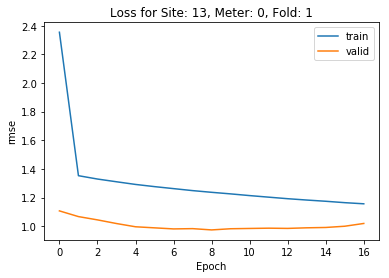

CPU times: user 1min 6s, sys: 4.1 s, total: 1min 10s
Wall time: 54 s
Preparing Site: 13 , meter: 0 , Fold: 2
Train on 912526 samples, validate on 304175 samples
Epoch 1/17
 - 7s - loss: 2.3815 - val_loss: 1.0029
Epoch 2/17
 - 6s - loss: 1.3845 - val_loss: 0.9757
Epoch 3/17
 - 6s - loss: 1.3605 - val_loss: 0.9682
Epoch 4/17
 - 6s - loss: 1.3417 - val_loss: 0.9439
Epoch 5/17
 - 6s - loss: 1.3223 - val_loss: 0.9369
Epoch 6/17
 - 6s - loss: 1.3080 - val_loss: 0.9338
Epoch 7/17
 - 6s - loss: 1.2946 - val_loss: 0.9449
Epoch 8/17
 - 6s - loss: 1.2819 - val_loss: 0.9405
Epoch 9/17
 - 6s - loss: 1.2700 - val_loss: 0.9395
Epoch 10/17
 - 6s - loss: 1.2590 - val_loss: 0.9520
Epoch 11/17
 - 6s - loss: 1.2468 - val_loss: 0.9478
Epoch 12/17
 - 6s - loss: 1.2378 - val_loss: 0.9383
Epoch 13/17
 - 6s - loss: 1.2280 - val_loss: 0.9489
Epoch 14/17
 - 6s - loss: 1.2184 - val_loss: 0.9417
Epoch 15/17
 - 6s - loss: 1.2098 - val_loss: 0.9511
Epoch 16/17
 - 6s - loss: 1.2005 - val_loss: 0.9461
Epoch 17/17
 - 6

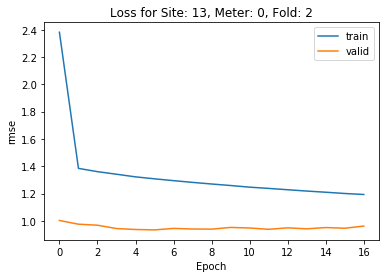

CPU times: user 1min 8s, sys: 4.01 s, total: 1min 12s
Wall time: 56.3 s
Preparing Site: 13 , meter: 0 , Fold: 3
Train on 912526 samples, validate on 304175 samples
Epoch 1/17
 - 7s - loss: 2.2809 - val_loss: 1.1216
Epoch 2/17
 - 6s - loss: 1.3312 - val_loss: 1.0517
Epoch 3/17
 - 6s - loss: 1.3050 - val_loss: 1.0225
Epoch 4/17
 - 6s - loss: 1.2851 - val_loss: 0.9971
Epoch 5/17
 - 6s - loss: 1.2677 - val_loss: 0.9893
Epoch 6/17
 - 6s - loss: 1.2532 - val_loss: 0.9707
Epoch 7/17
 - 6s - loss: 1.2374 - val_loss: 0.9799
Epoch 8/17
 - 6s - loss: 1.2249 - val_loss: 0.9614
Epoch 9/17
 - 6s - loss: 1.2112 - val_loss: 0.9553
Epoch 10/17
 - 6s - loss: 1.1993 - val_loss: 0.9620
Epoch 11/17
 - 6s - loss: 1.1882 - val_loss: 0.9631
Epoch 12/17
 - 6s - loss: 1.1768 - val_loss: 0.9550
Epoch 13/17
 - 6s - loss: 1.1673 - val_loss: 0.9617
Epoch 14/17
 - 6s - loss: 1.1575 - val_loss: 0.9587
Epoch 15/17
 - 6s - loss: 1.1486 - val_loss: 0.9644
Epoch 16/17
 - 6s - loss: 1.1394 - val_loss: 0.9672
Epoch 17/17
 

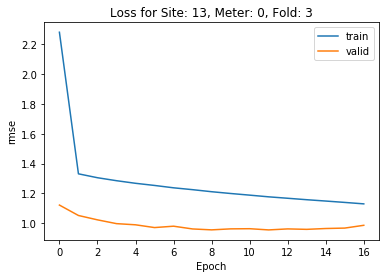

CPU times: user 1min 11s, sys: 4.08 s, total: 1min 15s
Wall time: 58.8 s
Preparing Site: 13 , meter: 0 , Fold: 4
Train on 912526 samples, validate on 304175 samples
Epoch 1/17
 - 7s - loss: 2.3528 - val_loss: 0.9719
Epoch 2/17
 - 6s - loss: 1.3967 - val_loss: 0.9460
Epoch 3/17
 - 6s - loss: 1.3746 - val_loss: 0.9300
Epoch 4/17
 - 6s - loss: 1.3565 - val_loss: 0.9091
Epoch 5/17
 - 6s - loss: 1.3404 - val_loss: 0.9095
Epoch 6/17
 - 6s - loss: 1.3257 - val_loss: 0.9201
Epoch 7/17
 - 6s - loss: 1.3133 - val_loss: 0.9123
Epoch 8/17
 - 6s - loss: 1.3018 - val_loss: 0.9152
Epoch 9/17
 - 6s - loss: 1.2910 - val_loss: 0.9208
Epoch 10/17
 - 6s - loss: 1.2804 - val_loss: 0.9125
Epoch 11/17
 - 6s - loss: 1.2690 - val_loss: 0.9212
Epoch 12/17
 - 6s - loss: 1.2594 - val_loss: 0.9284
Epoch 13/17
 - 6s - loss: 1.2497 - val_loss: 0.9240
Epoch 14/17
 - 6s - loss: 1.2402 - val_loss: 0.9359
Epoch 15/17
 - 6s - loss: 1.2323 - val_loss: 0.9253
Epoch 16/17
 - 6s - loss: 1.2230 - val_loss: 0.9333
Epoch 17/17


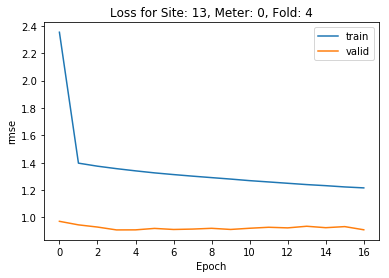

CPU times: user 1min 14s, sys: 4.07 s, total: 1min 18s
Wall time: 1min 1s

CV RMSE for Site: 13 and Meter: 0 is 1.1685863806236356

CV RMSE for Site: 13 is 1.1685863806236356


In [13]:
for meter in df_train.meter.unique():
    print("Building Model for site_id", site_id, "and meter", meter)
        
    df_train_site_meter = df_train[df_train.meter == meter].reset_index(drop=True)
    df_test_site_meter = df_test[df_test.meter == meter].reset_index(drop=True)
    
    pred_val = np.zeros(df_train_site_meter.shape[0])
    pred_test = np.zeros(df_test_site_meter.shape[0])

    row_ids_test = df_test_site_meter.row_id
    y_train_site_meter = df_train_site_meter.log_meter_reading.values
    
    df_train_site_meter = df_train_site_meter[features]
    df_test_site_meter = df_test_site_meter[features]

    df_train_site_meter = pd.get_dummies(df_train_site_meter)
    df_test_site_meter = pd.get_dummies(df_test_site_meter)
        
    for k, (train_idx, valid_idx) in enumerate(folds.split(df_train_site_meter, y_train_site_meter)):
        print("Preparing Site:", site_id, ", meter:", meter, ", Fold:", k+1)
        
        X_train, y_train = df_train_site_meter.iloc[train_idx], y_train_site_meter[train_idx]
        X_valid, y_valid = df_train_site_meter.iloc[valid_idx], y_train_site_meter[valid_idx]
        
        X_train.dropna(axis=1, how="all", inplace=True)
        X_train = X_train.loc[:, (X_train != X_train.iloc[0]).any()]

        X_valid = X_valid[X_train.columns]
        X_test = df_test_site_meter[X_train.columns]
        
        df_means = pd.concat([X_train, X_valid, X_test], ignore_index=True).mean()
        X_train.fillna(df_means, inplace=True)
        X_valid.fillna(df_means, inplace=True)
        X_test.fillna(df_means, inplace=True)
        
        sc = MinMaxScaler()
        sc.fit(pd.concat([X_train, X_valid, X_test], ignore_index=True))
        
        X_train = np.array(sc.transform(X_train))
        X_valid = np.array(sc.transform(X_valid))
        X_test = np.array(sc.transform(X_test))
        
        model = Sequential()
        model.add(Dense(256, input_dim=X_train.shape[1], activation="relu", kernel_initializer=keras.initializers.glorot_uniform(seed=seed)))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(64, activation="tanh", kernel_initializer=keras.initializers.glorot_uniform(seed=seed)))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(8, activation="tanh", kernel_initializer=keras.initializers.glorot_uniform(seed=seed)))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(1))
        model.compile(loss=rmse, optimizer="adam")
        
        model_ffnn = model.fit(X_train, y_train, epochs=17, batch_size=1000, validation_data=(X_valid, y_valid), verbose=2, shuffle=False)

        plt.plot(model_ffnn.history["loss"])
        plt.plot(model_ffnn.history["val_loss"])
        plt.title("Loss for Site: " + str(site_id) + ", Meter: " + str(meter) + ", Fold: " + str(k+1))
        plt.ylabel("rmse")
        plt.xlabel("Epoch")
        plt.legend(["train", "valid"], loc="upper right")
        plt.show()
        
        pred_val[valid_idx] = model.predict(X_valid).ravel()
        %time pred_test += model.predict(X_test).ravel() / cv
        
        gc.collect()
        
    df_valid = pd.DataFrame({"site_id": site_id, "meter": meter, "meter_reading": np.expm1(y_train_site_meter), "pred_ffnn": np.clip(np.expm1(pred_val), 0, a_max=None)})
    df_pred = pd.DataFrame({"row_id": row_ids_test, "meter_reading": np.clip(np.expm1(pred_test), 0, a_max=None)})
    
    df_cv.append(df_valid)
    df_preds.append(df_pred)
    
    gc.collect()
    
    print("\nCV RMSE for Site:", site_id, "and Meter:", meter, "is", np.sqrt(mean_squared_error(np.log1p(df_valid.meter_reading), np.log1p(df_valid.pred_ffnn))))

df_cv = pd.concat(df_cv)
print("\nCV RMSE for Site:", site_id, "is", np.sqrt(mean_squared_error(np.log1p(df_cv.meter_reading), np.log1p(df_cv.pred_ffnn))))

In [14]:
df_preds = pd.concat(df_preds)
#df_preds.to_csv("/home/rohan/kaggle/ASHRAE/data/ffnn_pred_site_" + str(site_id) + ".csv", index=False)
df_preds.to_csv("../sub/ffnn_pred_site_" + str(site_id) + ".csv", index=False)